In [3]:
# Importing the Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

In [4]:
# Data Collection & Processing

In [7]:

# Loading the dataset
data = pd.read_csv("tested.csv")
data.head() 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
# Table Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [9]:
# Number of Rows and Columns present in the dataset
data.shape

(418, 12)

In [10]:
# Checking the number of missing values in each column
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
#Handling the missing values

In [13]:
# Cabin column contains many missing columns so we'll drop the Cabin column
data = data.drop(columns='Cabin')
# Replace the missing values in Age column with mean value
data['Age'].fillna(data['Age'].mean(), inplace=True)
# Finding the mode value in Fare column
data['Fare'].mode()[0]

7.75

In [14]:
data['Fare'].fillna(data['Fare'].mode()[0], inplace=True)

In [15]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [16]:
#Data Analysis
# Statistical measures abour the data
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.560497
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.857145
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          418 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         418 non-null    float64
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 36.1+ KB


In [18]:
# Printing the target column
data["Survived"]

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

In [19]:
#Data Visualization
sns.set()
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [20]:
# Calculate the average of "Survived"
print(data["Survived"].mean())

0.36363636363636365


In [21]:
# Finding the number of people survived and not survived
data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

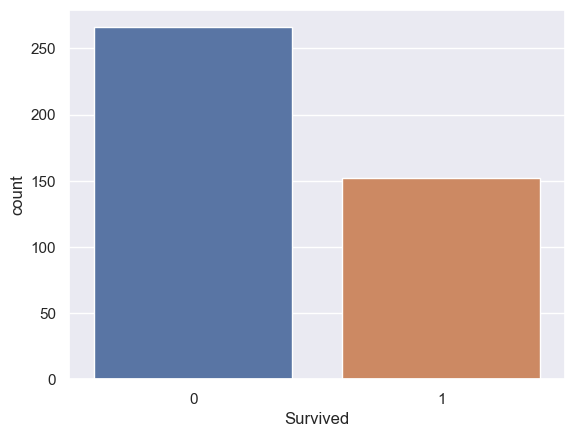

In [22]:
# Graphical representation of Survived column
sns.countplot(x='Survived', data=data)

In [23]:
# Finding the number of people survived and not survived
data['Survived'].value_counts()

Survived
0    266
1    152
Name: count, dtype: int64

In [24]:

# Number of males and females in Titanic
data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

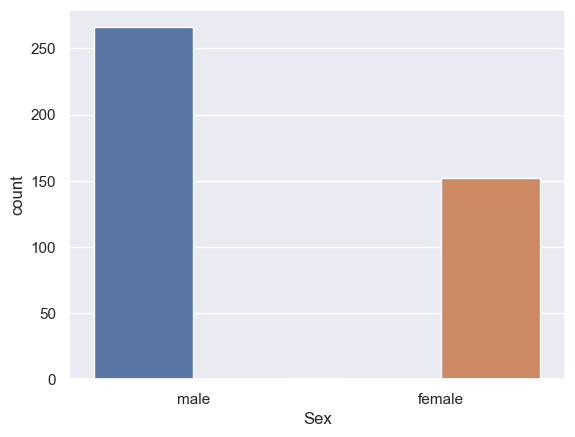

In [25]:
# Graphical representation of Survied based on Gender
sns.countplot(x='Sex', hue='Survived', data=data)

In [26]:
#CONCLUSION: All the female passengers survived and all the male passengers not survived

# Number of passengers in each passenger class
data['Pclass'].value_counts()

Pclass
3    218
1    107
2     93
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

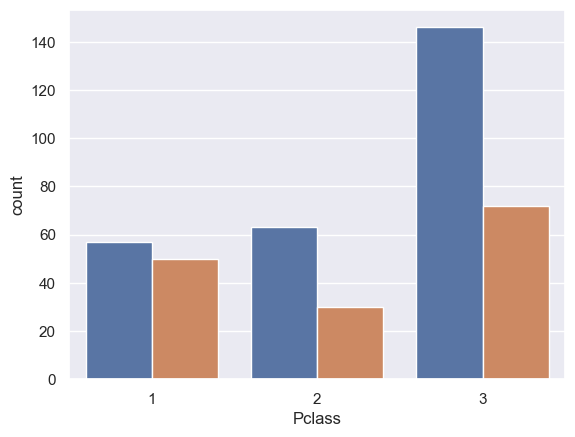

In [27]:
# Graphical representation of Survived based on Pclass
sns.countplot(x='Pclass', hue='Survived', data=data)

In [28]:
#CONCLUSION: Majority passengers in the Pclass=1 survived and majority passengers from the Pclass=3 not survived

# Number of passengers in each Embarked
data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

AttributeError: 'numpy.int64' object has no attribute 'startswith'

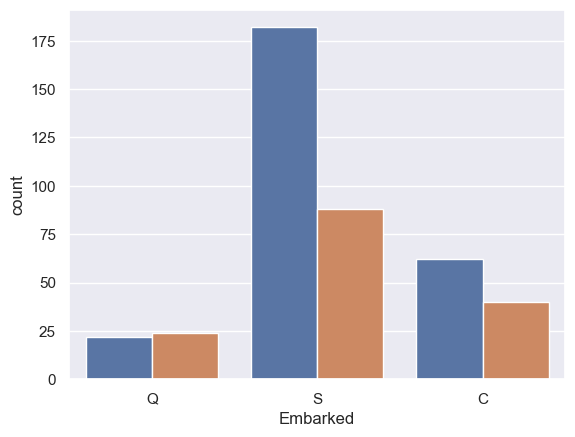

In [30]:
# Graphical representation of Survived based on Pclass
sns.countplot(x='Embarked', hue='Survived', data=data)

In [32]:

#CONCLUSION: Majority passengers in the Embarked=Q survived and majority passengers from the Embarked=S not survived

In [33]:
#Encoding the Categorical Columns
data['Sex'].value_counts()

Sex
male      266
female    152
Name: count, dtype: int64

In [34]:
data['Embarked'].value_counts()

Embarked
S    270
C    102
Q     46
Name: count, dtype: int64

In [35]:
data['Pclass'].value_counts()


Pclass
3    218
1    107
2     93
Name: count, dtype: int64

In [36]:
# Converting the categorical columns
data.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':1, 'C':2, 'Q':3}}, inplace=True)


In [37]:
data['Sex'].value_counts()

Sex
0    266
1    152
Name: count, dtype: int64

In [38]:
data['Embarked'].value_counts()

Embarked
1    270
2    102
3     46
Name: count, dtype: int64

In [39]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,3
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,1
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,3
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,1


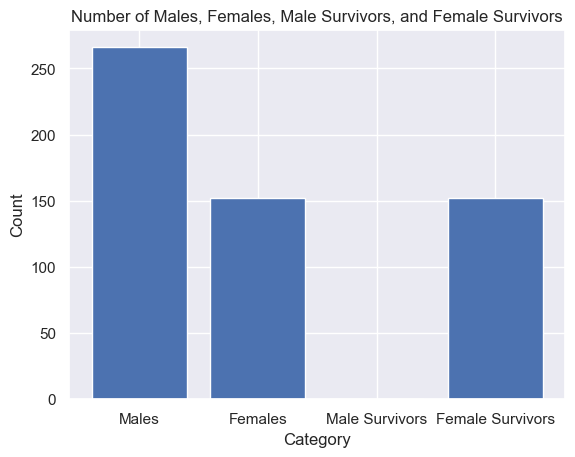

Number of males: 266
Number of females: 152
Number of male survivors: 0
Number of female survivors: 152


In [40]:
# Count the number of males and females
male_count = data[data['Sex'] == 0].shape[0]
female_count = data[data['Sex'] == 1].shape[0]

# Count the number of male survivors and female survivors
male_survivors = len(data[(data['Sex'] == 0) & (data['Survived'] == 1)])
female_survivors = len(data[(data['Sex'] == 1) & (data['Survived'] == 1)])

labels = ['Males', 'Females', 'Male Survivors', 'Female Survivors']
counts = [male_count, female_count, male_survivors, female_survivors]

# Plotting
plt.bar(labels, counts)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Number of Males, Females, Male Survivors, and Female Survivors')

# Display the plot
plt.show()

# Print the results
print("Number of males:", male_count)
print("Number of females:", female_count)
print("Number of male survivors:", male_survivors)
print("Number of female survivors:", female_survivors)

In [41]:
#Separating target and features
x = data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
y = data[['Survived']]

In [42]:
print(x.head())
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
0       3    0  34.5      0      0   7.8292         3
1       3    1  47.0      1      0   7.0000         1
2       2    0  62.0      0      0   9.6875         3
3       3    0  27.0      0      0   8.6625         1
4       3    1  22.0      1      1  12.2875         1
   Survived
0         0
1         1
2         0
3         0
4         1


In [43]:
#Splitting the data into training and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(334, 7) (84, 7) (334, 1) (84, 1)


In [44]:
print(x.shape, y.shape)

(418, 7) (418, 1)


In [45]:
#Modeling Training
#Using RandomForestClassifier

model_1= RandomForestClassifier(n_estimators=100, random_state=50)
# Training model with train data
model_1.fit(x_train, y_train)

C:\Users\PRATHMESH\AppData\Local\Temp\ipykernel_16480\3788749070.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_1.fit(x_train, y_train)


RandomForestClassifier(random_state=50)

In [46]:
#Using DecisionTreeClassifier
model_2 = DecisionTreeClassifier(max_depth=None)
model_2.fit(x_train, y_train)

DecisionTreeClassifier()

In [47]:
# Model Evaluation
# Using Accuracy Score

# Accuracy on test data
x_test_prediction_1 = model_1.predict(x_test)
accuracy_1 = accuracy_score(y_test, x_test_prediction_1)
print("RandomForestClassifier\nAccuracy Score: ", accuracy_1)

x_test_prediction_2 = model_2.predict(x_test)
accuracy_2 = accuracy_score(y_test, x_test_prediction_2)
print("DecisionTreeClassifier\nAccuracy Score: ", accuracy_2)

RandomForestClassifier
Accuracy Score:  1.0
DecisionTreeClassifier
Accuracy Score:  1.0


In [48]:
# Classification Report
print("Random Forest Classifier Performance:")
print(classification_report(y_test, x_test_prediction_1))
print()
print("Decision Tree Classifier Performance:")
print(classification_report(y_test, x_test_prediction_2))

Random Forest Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84


Decision Tree Classifier Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        51
           1       1.00      1.00      1.00        33

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

